# Solución sugerida actividad en casa 1

In [1]:
## Cargo librerias
import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis  ## funciones estadísticas

In [3]:
## Cargo hoja de notas
notas=pd.read_excel("NOTAS.xlsx", sheet_name="Notas")
notas

,Nivel,Codigo,1P,2P,3P,NF,Género
0,1,1,3.8,3.7,3.3,3.990,M
1,1,2,3.0,3.6,3.1,3.725,F
2,1,3,3.2,3.0,3.4,3.305,M
3,1,4,3.1,0.0,0.0,0.670,M
4,1,5,4.4,0.0,0.0,1.245,F
...,...,...,...,...,...,...,...
1774,6,1775,4.3,3.9,3.8,4.235,F
1775,6,1776,4.2,3.7,4.1,4.295,F
1776,6,1777,3.5,3.0,3.2,3.440,F
1777,6,1778,3.7,3.4,3.7,3.790,F


In [4]:
## Cargo hoja de información Saber 11
S11=pd.read_excel("NOTAS.xlsx", sheet_name="INFO_S11")
S11

,Codigo,PG,PING,NIVING
0,1,346,93,B+
1,2,330,100,B+
2,3,367,76,B1
3,4,336,63,A2
4,5,367,91,B+
...,...,...,...,...
1774,1775,338,100,B+
1775,1776,342,59,A2
1776,1777,371,56,A1
1777,1778,352,78,B1


In [5]:
## Uno las bases de datos
base=pd.merge(notas,S11,how="left",on="Codigo")
base

,Nivel,Codigo,1P,2P,3P,NF,Género,PG,PING,NIVING
0,1,1,3.8,3.7,3.3,3.990,M,346,93,B+
1,1,2,3.0,3.6,3.1,3.725,F,330,100,B+
2,1,3,3.2,3.0,3.4,3.305,M,367,76,B1
3,1,4,3.1,0.0,0.0,0.670,M,336,63,A2
4,1,5,4.4,0.0,0.0,1.245,F,367,91,B+
...,...,...,...,...,...,...,...,...,...,...
1774,6,1775,4.3,3.9,3.8,4.235,F,338,100,B+
1775,6,1776,4.2,3.7,4.1,4.295,F,342,59,A2
1776,6,1777,3.5,3.0,3.2,3.440,F,371,56,A1
1777,6,1778,3.7,3.4,3.7,3.790,F,352,78,B1


In [6]:
## Defino intuitivamente que tipo de columna es cada una:
# NIvel: Cualitatitva ordinal
# Codigo: CUalitativa nominal
# 1P, 2P, 3P, NF: Cuantitativa continua
# Género: Cualitativa nominal
# PG, PING: CUantitativa continua
# NIVING: Cualitativa ordinal

In [7]:
## Columna que identifica si aprobó o no
base["Aprob"]=np.where(base["NF"]<3,"No","Sí")
base

,Nivel,Codigo,1P,2P,3P,NF,Género,PG,PING,NIVING,Aprob
0,1,1,3.8,3.7,3.3,3.990,M,346,93,B+,Sí
1,1,2,3.0,3.6,3.1,3.725,F,330,100,B+,Sí
2,1,3,3.2,3.0,3.4,3.305,M,367,76,B1,Sí
3,1,4,3.1,0.0,0.0,0.670,M,336,63,A2,No
4,1,5,4.4,0.0,0.0,1.245,F,367,91,B+,No
...,...,...,...,...,...,...,...,...,...,...,...
1774,6,1775,4.3,3.9,3.8,4.235,F,338,100,B+,Sí
1775,6,1776,4.2,3.7,4.1,4.295,F,342,59,A2,Sí
1776,6,1777,3.5,3.0,3.2,3.440,F,371,56,A1,Sí
1777,6,1778,3.7,3.4,3.7,3.790,F,352,78,B1,Sí


In [8]:
## Cuántos parciales aprobó?
base["N_Parciales_Aprob"]=np.where(base["1P"]<3,0,1)+np.where(base["2P"]<3,0,1)+np.where(base["3P"]<3,0,1)
base

,Nivel,Codigo,1P,2P,3P,NF,Género,PG,PING,NIVING,Aprob,N_Parciales_Aprob
0,1,1,3.8,3.7,3.3,3.990,M,346,93,B+,Sí,3
1,1,2,3.0,3.6,3.1,3.725,F,330,100,B+,Sí,3
2,1,3,3.2,3.0,3.4,3.305,M,367,76,B1,Sí,3
3,1,4,3.1,0.0,0.0,0.670,M,336,63,A2,No,1
4,1,5,4.4,0.0,0.0,1.245,F,367,91,B+,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1774,6,1775,4.3,3.9,3.8,4.235,F,338,100,B+,Sí,3
1775,6,1776,4.2,3.7,4.1,4.295,F,342,59,A2,Sí,3
1776,6,1777,3.5,3.0,3.2,3.440,F,371,56,A1,Sí,3
1777,6,1778,3.7,3.4,3.7,3.790,F,352,78,B1,Sí,3


In [20]:
## Cuántos estudiantes hay en cada nivel?
tabla1=pd.crosstab(index=base["Nivel"], columns="count").reset_index()
tabla1['Freq. Rel']=tabla1['count']/sum(tabla1['count'])
tabla1

col_0,Nivel,count,Freq. Rel
0,1,141,0.079258
1,2,235,0.132097
2,3,412,0.231591
3,4,272,0.152895
4,5,395,0.222035
5,6,324,0.182125


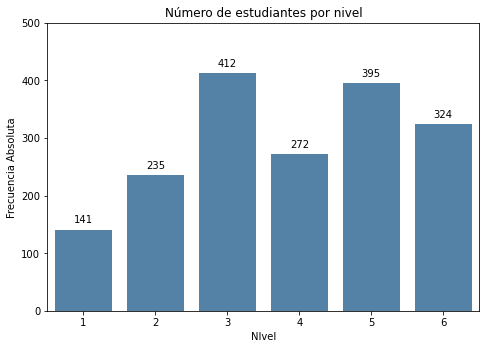

In [21]:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.barplot(x=tabla1["Nivel"],y=tabla1["count"], color="steelblue") 
ax.bar_label(ax.containers[0], label_type='edge',fmt='%.f', padding=5)   
ax.set(ylim=(0, 500))
plt.ylabel('Frecuencia Absoluta')  
plt.xlabel('NIvel')         
plt.title("Número de estudiantes por nivel")  
plt.show()  

In [22]:
## distribución por género?
tabla2=pd.crosstab(index=base["Género"], columns="count").reset_index()
tabla2['Freq. Rel']=tabla2['count']/sum(tabla2['count'])
tabla2

col_0,Género,count,Freq. Rel
0,F,894,0.50253
1,M,885,0.49747


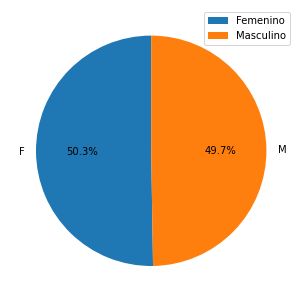

In [27]:
fig_torta = plt.figure() 
ax = fig_torta.add_axes([0,0,1,1])
plt.pie(tabla2["Freq. Rel"], labels=tabla2["Género"],autopct='%1.1f%%',startangle=90)
plt.legend(labels=["Femenino","Masculino"],loc="best")
plt.show()

In [28]:
## Distribución puntaje de inglés en S11?
def fun_tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas

fun_tabla_descriptivas(base['PING'])

,PING
count,1779.000000
mean,74.782462
std,15.050586
min,50.000000
25%,61.000000
50%,76.000000
75%,88.000000
max,100.000000
coef. variation,0.201258
skew,-0.003830


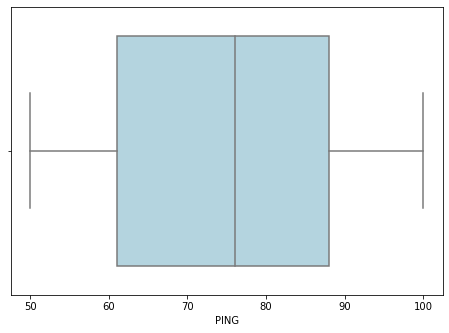

In [30]:
fig_box2 = plt.figure() 
ax = fig_box2.add_axes([0,0,1,1])
ax=sns.boxplot(x=base['PING'],color="lightblue")
#ax = sns.swarmplot(x=base['PING'],color='black')
plt.show() 

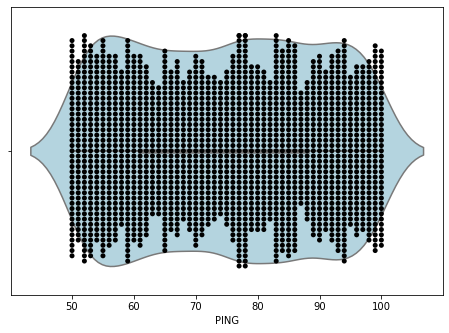

In [33]:
fig_violin = plt.figure() 
ax = fig_violin.add_axes([0,0,1,1])
ax=sns.violinplot(x=base['PING'],color="lightblue")
ax = sns.swarmplot(x=base['PING'],color='black')
plt.show()

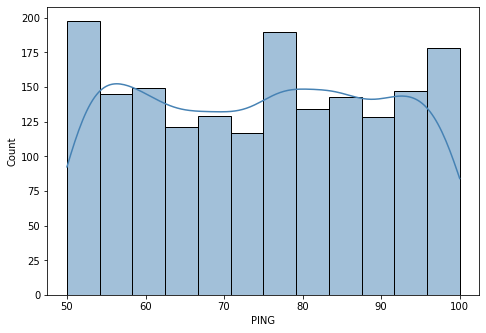

In [34]:
fig_hist = plt.figure() 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=base['PING'],kde=True,color="steelblue")
plt.show() 

In [35]:
## Nota definitiva
fun_tabla_descriptivas(base['NF'])

,NF
count,1779.000000
mean,3.306773
std,0.666492
min,0.165000
25%,3.105000
50%,3.415000
75%,3.690000
max,4.745000
coef. variation,0.201554
skew,-2.039166


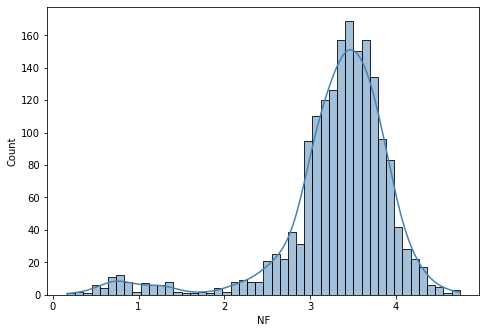

In [36]:
fig_hist = plt.figure() 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=base['NF'],kde=True,color="steelblue")
plt.show() 

In [47]:
## Tasa de aprobación por nivel
tabla_x=pd.crosstab(index=base["Nivel"],columns=base["Aprob"],margins=False,normalize="index").reset_index()
tabla_x

Aprob,Nivel,No,Sí
0,1,0.219858,0.780142
1,2,0.200000,0.800000
2,3,0.186893,0.813107
3,4,0.121324,0.878676
4,5,0.210127,0.789873
5,6,0.163580,0.836420


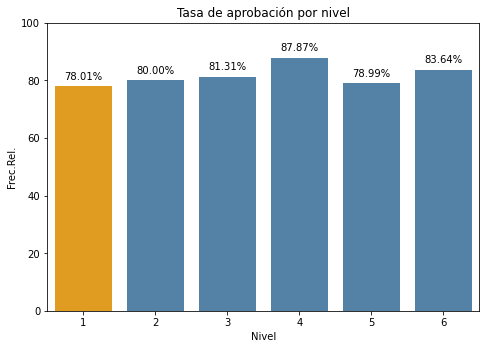

In [51]:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
cols = ['orange' if (x == min(tabla_x["Sí"])) else 'steelblue' for x in tabla_x["Sí"]]
ax=sns.barplot(x=tabla_x["Nivel"],y=tabla_x["Sí"]*100, palette=cols) ## aquí es el cambio
ax.bar_label(ax.containers[0], label_type='edge',fmt='%.2f%%', padding=5)   
ax.set(ylim=(0, 100))
plt.ylabel('Frec.Rel.')  
plt.xlabel('Nivel')         
plt.title("Tasa de aprobación por nivel")  
plt.show()

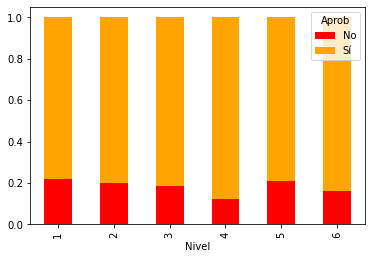

In [52]:
tabla_x.plot(x='Nivel',kind='bar', stacked=True, color=['red', 'orange'])
plt.xlabel('Nivel')
plt.show()

In [53]:
## Filtre por nivel con aprobación más baja y explore los parciales
nivel1=base[base["Nivel"]==1].reset_index(drop=True)
nivel1

,Nivel,Codigo,1P,2P,3P,NF,Género,PG,PING,NIVING,Aprob,N_Parciales_Aprob
0,1,1,3.8,3.7,3.3,3.990,M,346,93,B+,Sí,3
1,1,2,3.0,3.6,3.1,3.725,F,330,100,B+,Sí,3
2,1,3,3.2,3.0,3.4,3.305,M,367,76,B1,Sí,3
3,1,4,3.1,0.0,0.0,0.670,M,336,63,A2,No,1
4,1,5,4.4,0.0,0.0,1.245,F,367,91,B+,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
136,1,137,3.6,3.7,1.0,2.955,F,332,88,B+,No,2
137,1,138,4.0,3.5,3.1,3.805,F,310,64,A2,Sí,3
138,1,139,3.9,4.1,2.8,3.735,M,389,55,A1,Sí,2
139,1,140,4.8,4.6,4.3,4.545,F,345,53,A1,Sí,3


In [68]:
fun_tabla_descriptivas(nivel1[['1P','2P','3P']])

,1P,2P,3P
count,141.000000,141.000000,141.000000
mean,3.655319,3.340426,2.769504
std,0.699533,1.101037,1.121284
min,1.800000,0.000000,0.000000
25%,3.100000,3.000000,2.400000
50%,3.700000,3.500000,3.000000
75%,4.200000,4.000000,3.400000
max,5.000000,5.000000,4.400000
coef. variation,0.191374,0.329610,0.404868
skew,-0.302665,-1.644668,-1.321617


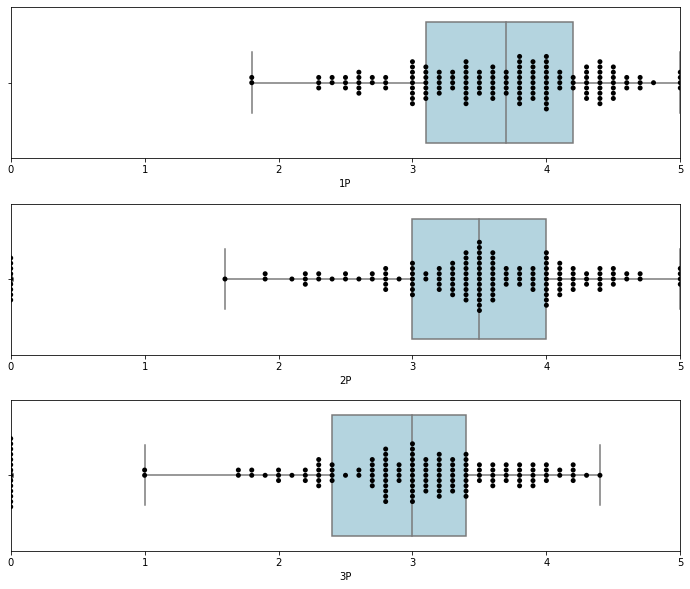

In [67]:
fig, axs = plt.subplots(nrows=3)
fig.set_size_inches(12, 10)
fig.subplots_adjust(hspace=0.3)

ax1=sns.boxplot(x=nivel1['1P'],color="lightblue",ax=axs[0])
ax1=sns.swarmplot(x=nivel1['1P'],color='black',ax=axs[0])
ax1.set(xlim=(0, 5))

ax2=sns.boxplot(x=nivel1['2P'],color="lightblue",ax=axs[1])
ax2=sns.swarmplot(x=nivel1['2P'],color='black',ax=axs[1])
ax2.set(xlim=(0, 5))

ax3=sns.boxplot(x=nivel1['3P'],color="lightblue",ax=axs[2])
ax3=sns.swarmplot(x=nivel1['3P'],color='black',ax=axs[2])
ax3.set(xlim=(0, 5))

plt.show()  